## Loading libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the CSV data

In [5]:
file_path = 'extended_survey_data.csv'
df = pd.read_csv(file_path)

## Group by Role and Calculate Means

In [7]:
role_means = df.groupby('Role')[['Effectiveness Traditional Essays', 'Effectiveness Reflective Reports']].mean()
print(role_means)

               Effectiveness Traditional Essays  \
Role                                              
Administrator                          5.000000   
Educator                               6.666667   
Researcher                             9.000000   
Student                                7.000000   

               Effectiveness Reflective Reports  
Role                                             
Administrator                          2.500000  
Educator                               3.666667  
Researcher                             5.000000  
Student                                3.000000  


## Plotting - Bar chart of mean effectiveness ratings

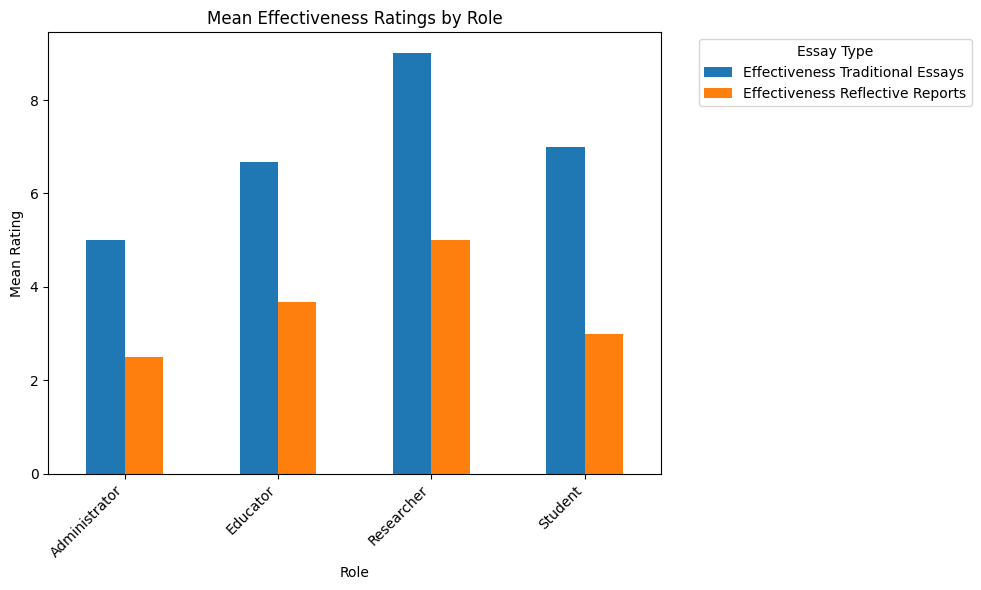

In [8]:
plt.figure(figsize=(10, 6))
role_means.plot(kind='bar', ax=plt.gca())
plt.title('Mean Effectiveness Ratings by Role')
plt.xlabel('Role')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Essay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Histogram of Level of Digital Literacy

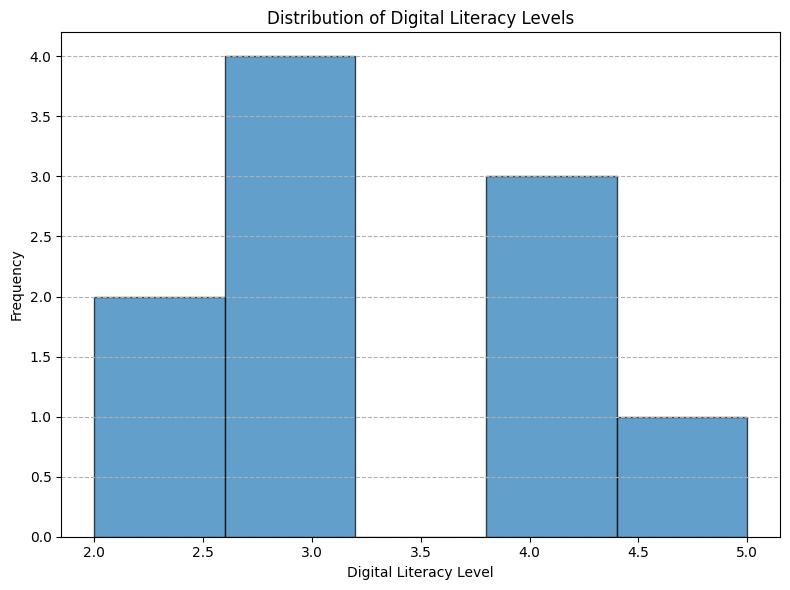

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['Level of Digital Literacy'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Digital Literacy Levels')
plt.xlabel('Digital Literacy Level')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Pie chart of AI Tools Setting Preference

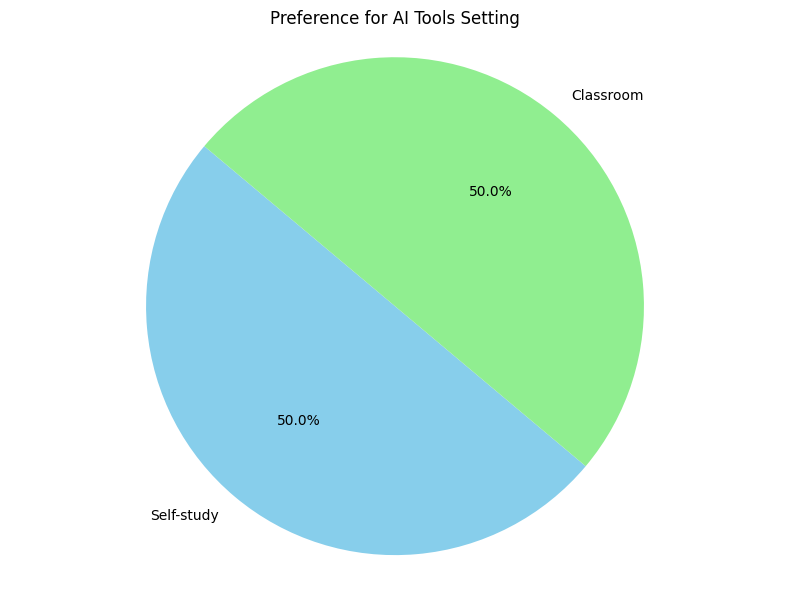

In [10]:
ai_settings = df['AI Tools Setting Preference'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ai_settings, labels=ai_settings.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Preference for AI Tools Setting')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Boxplot of Satisfaction with User Support

/tmp/ipykernel_31584/3584085750.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Satisfaction with User Support (Traditional Essays)'].dropna(),


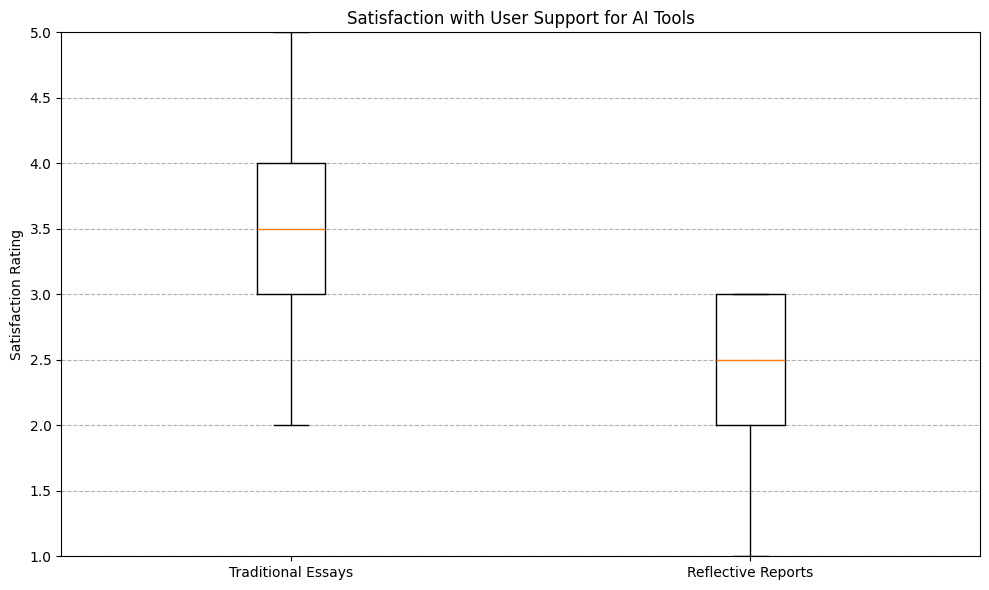

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Satisfaction with User Support (Traditional Essays)'].dropna(), 
             df['Satisfaction with User Support (Reflective Reports)'].dropna()],
            labels=['Traditional Essays', 'Reflective Reports'])
plt.title('Satisfaction with User Support for AI Tools')
plt.ylabel('Satisfaction Rating')
plt.ylim(1, 5)  # Assuming satisfaction rating is on a scale from 1 to 5
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Scatter plot of Impact on Quality vs. Enhancement of Learning

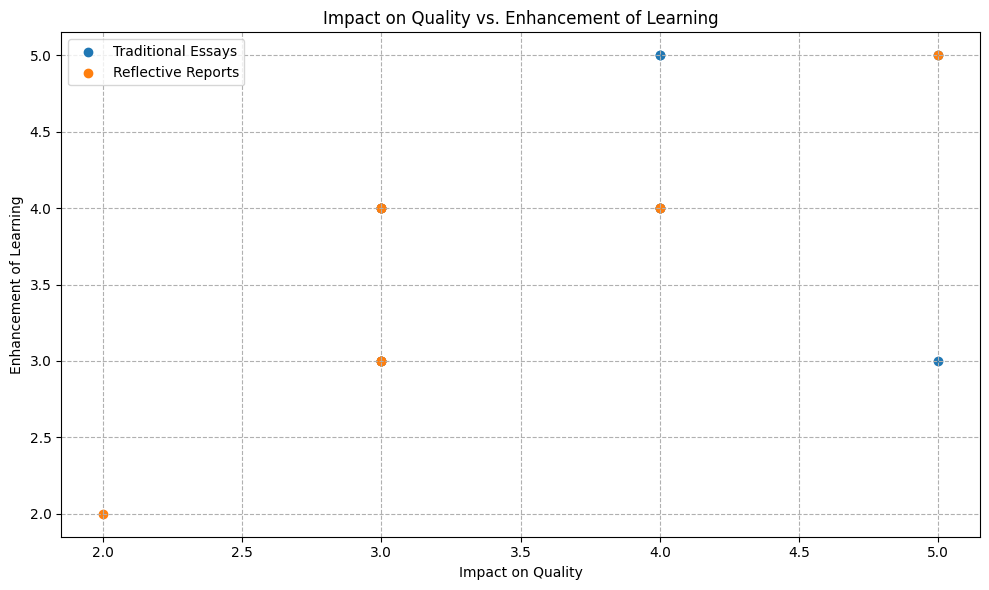

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Impact on Quality of Essays (Traditional Essays)'],
            df['Enhancement of Learning (Traditional Essays)'],
            label='Traditional Essays')
plt.scatter(df['Impact on Quality of Essays (Reflective Reports)'],
            df['Enhancement of Learning (Reflective Reports)'],
            label='Reflective Reports')
plt.title('Impact on Quality vs. Enhancement of Learning')
plt.xlabel('Impact on Quality')
plt.ylabel('Enhancement of Learning')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()